<a href="https://colab.research.google.com/github/CrowdPI/Computer-Vision-Model-Training/blob/main/CrowdPI_Instance_Segmentation_Roboflow_YoloV8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [1]:
import os

In [2]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [3]:
# !pip3 install ultralytics
!pip3 install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.1/873.1 kB 21.2 MB/s eta 0:00:00


In [4]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Sep 19 04:03:27 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# ROBOFLOW

In [5]:
!pip install roboflow
from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [6]:
rf = Roboflow(api_key="GBpqp3SrTf9e1QsUt58O")
project = rf.workspace("mrt-xawd1").project("productlabels")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.97, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to ProductLabels-2 in yolov8:: 100%|██████████| 170/170 [00:00<00:00, 4329.88it/s]


In [ ]:
EPOCHS=3

In [8]:
!yolo task=segment mode=train model=yolov8n-seg.pt data={dataset.location}/data.yaml epochs=EPOCHS imgsz=640


Ultralytics YOLOv8.2.97 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/ProductLabels-2/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

# Explore


In [9]:
# from IPython import display
from IPython.display import Image

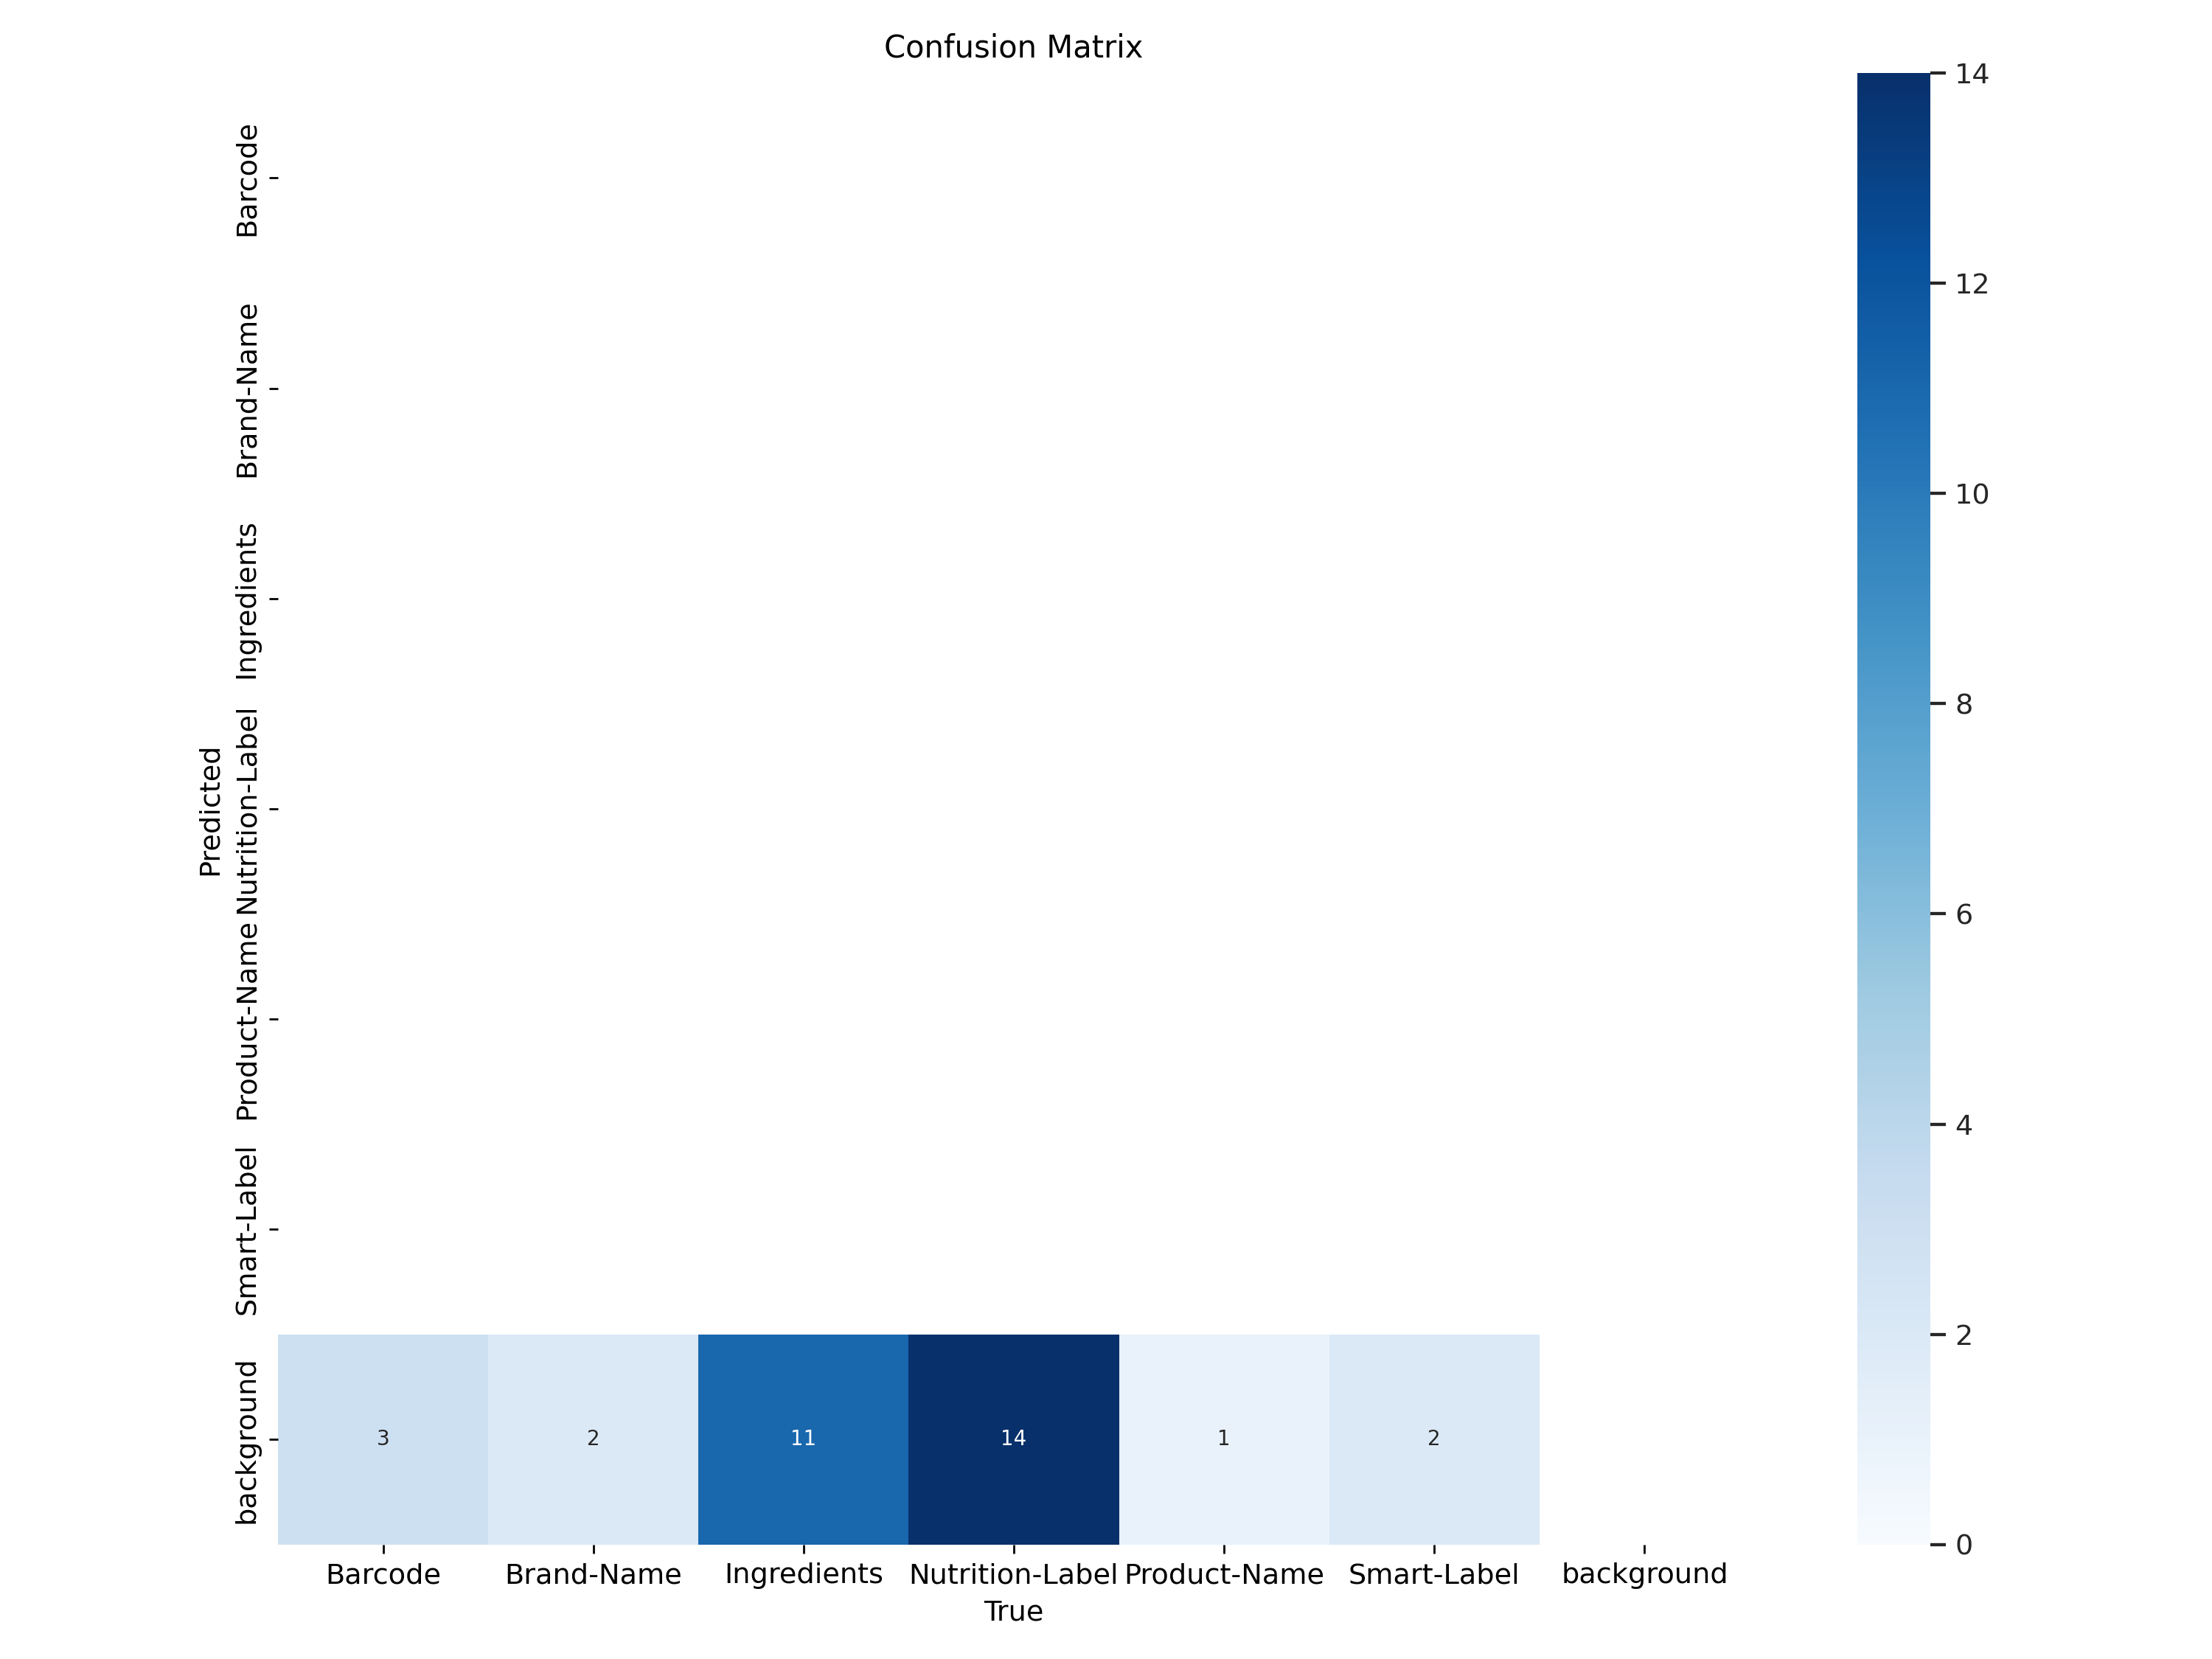

In [12]:
Image(filename=f'/content/runs/segment/train2/confusion_matrix.png', width=600)

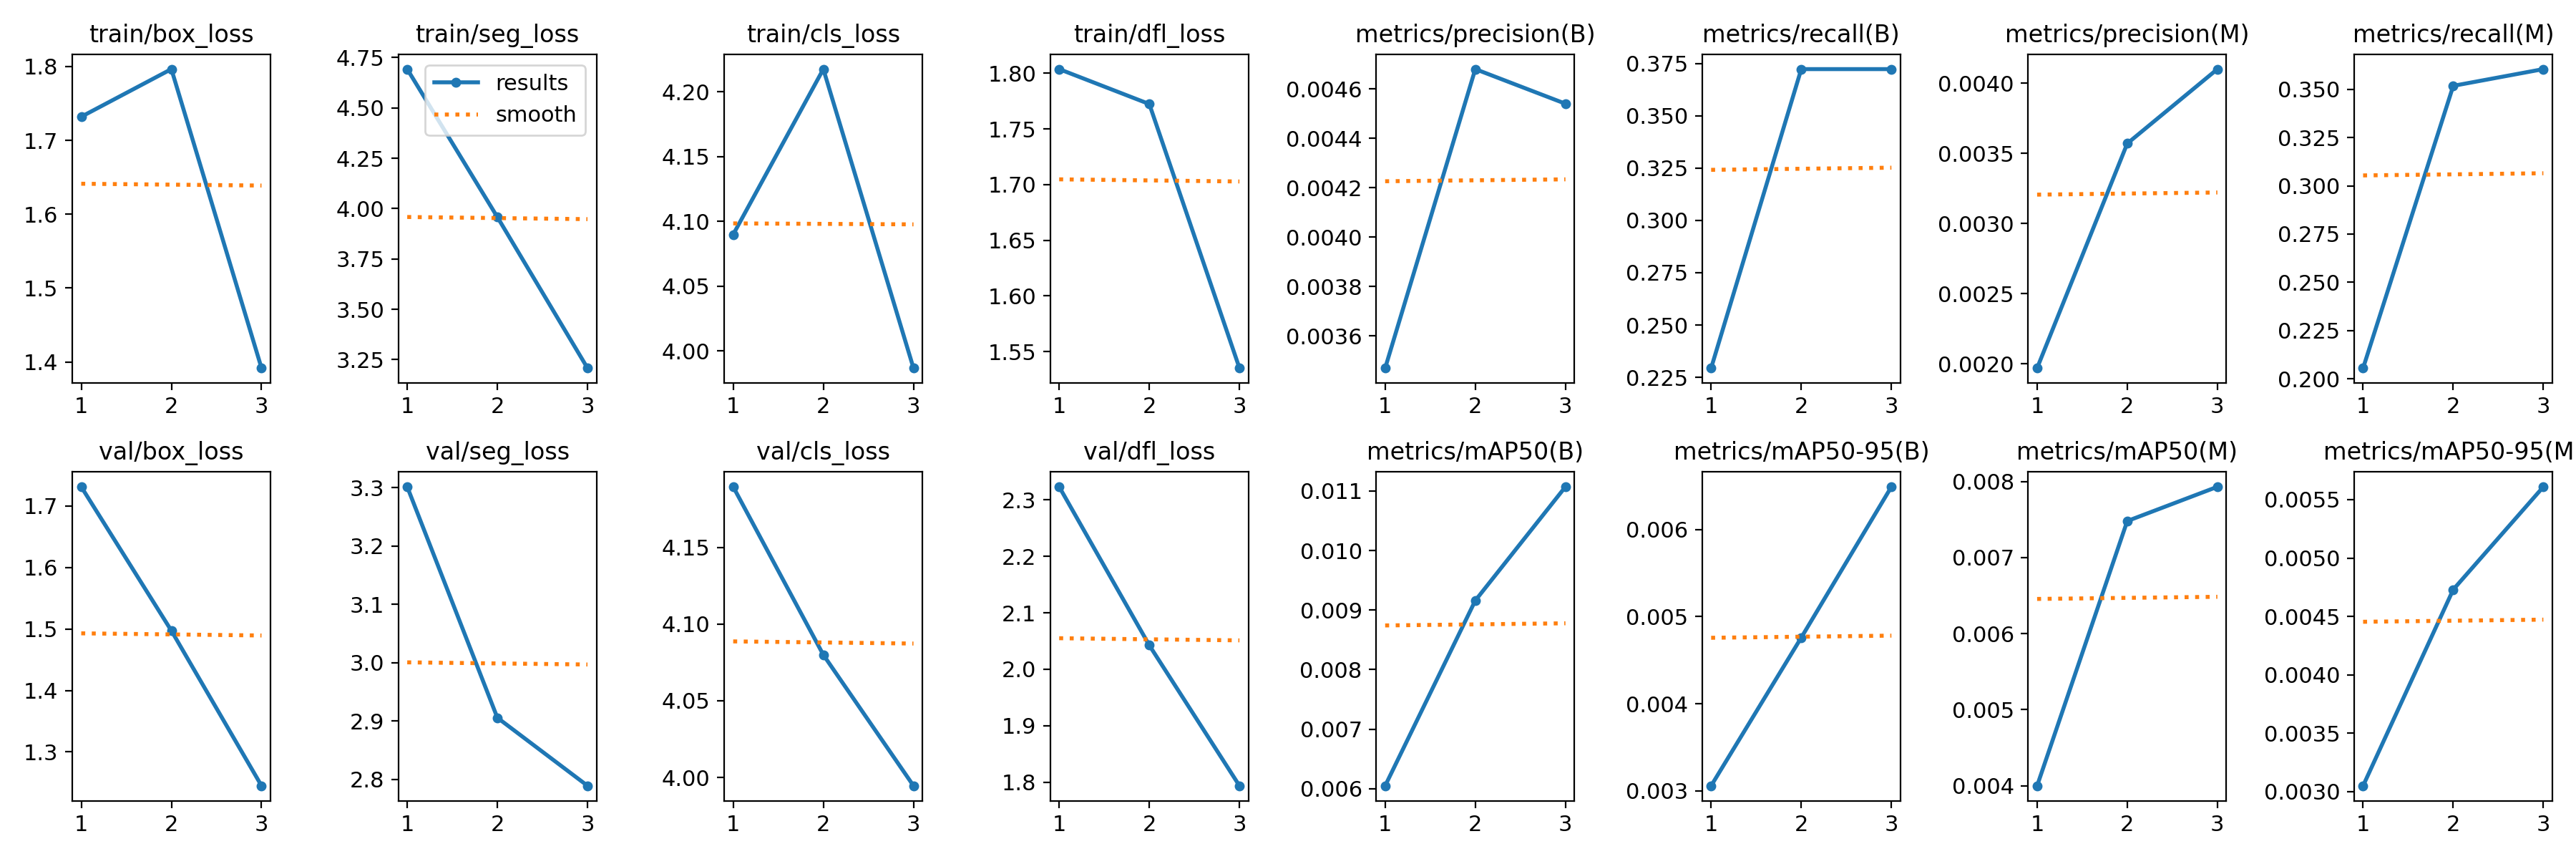

In [15]:
Image(filename=f'/content/runs/segment/train2/results.png', width=1000)

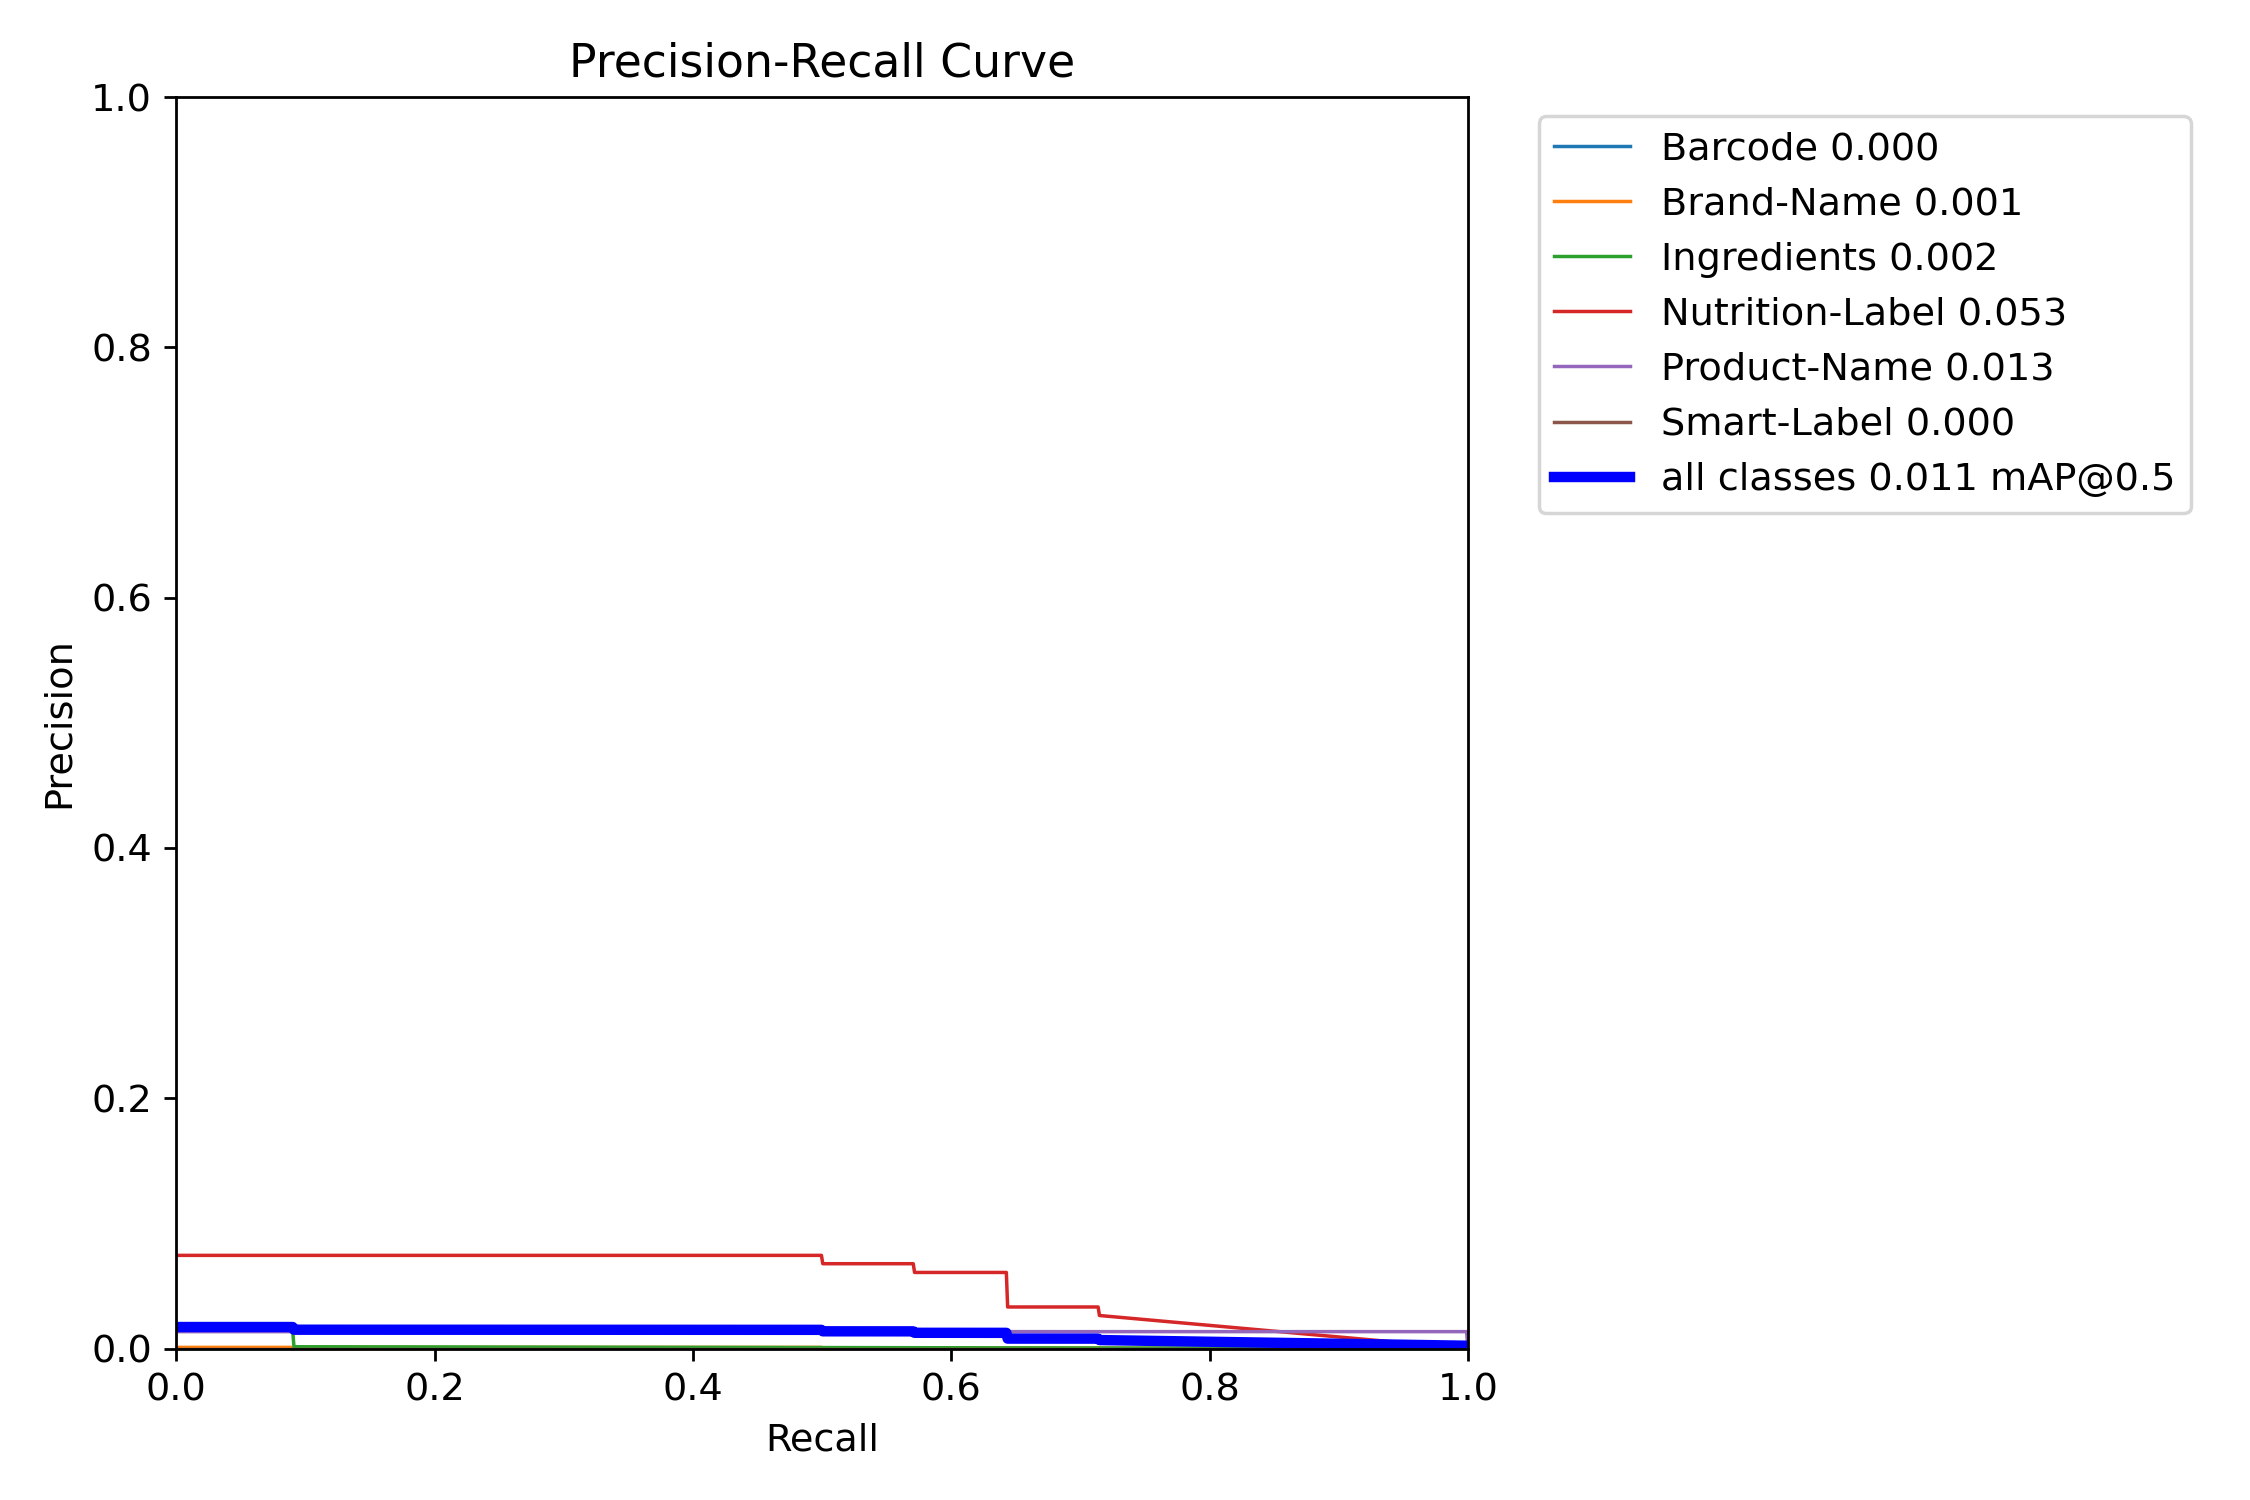

In [16]:
Image(filename=f'/content/runs/segment/train2/BoxPR_curve.png', width=1000)

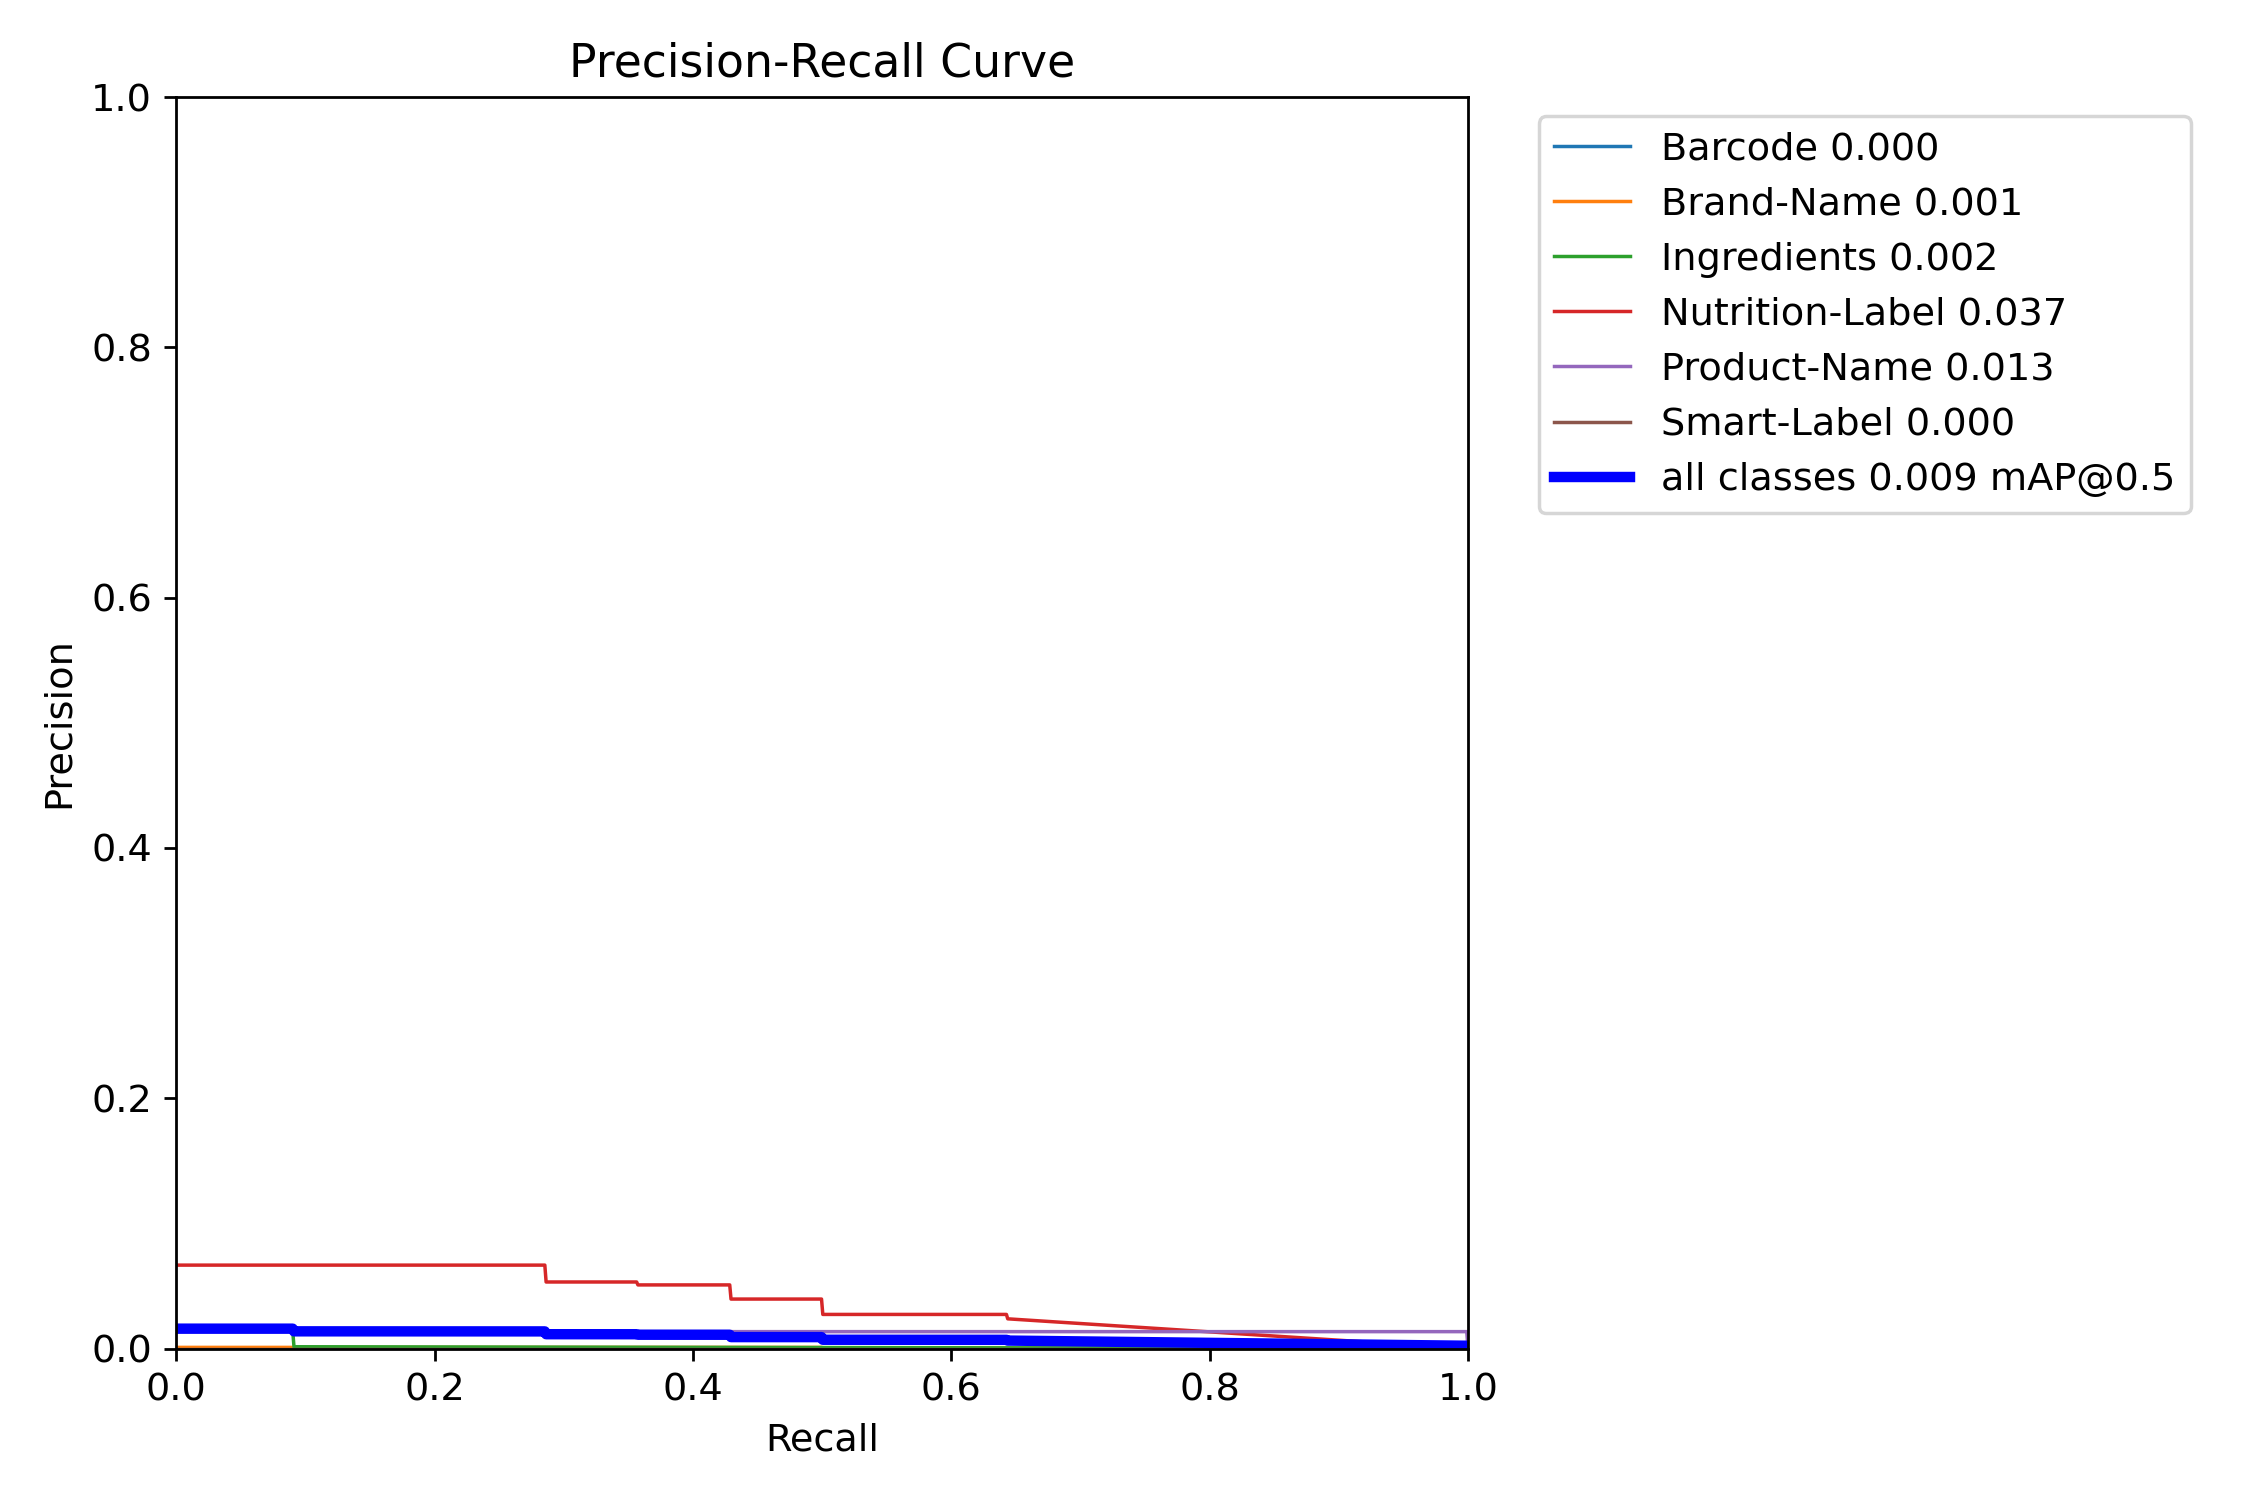

In [17]:
Image(filename=f'/content/runs/segment/train2/MaskPR_curve.png', width=1000)

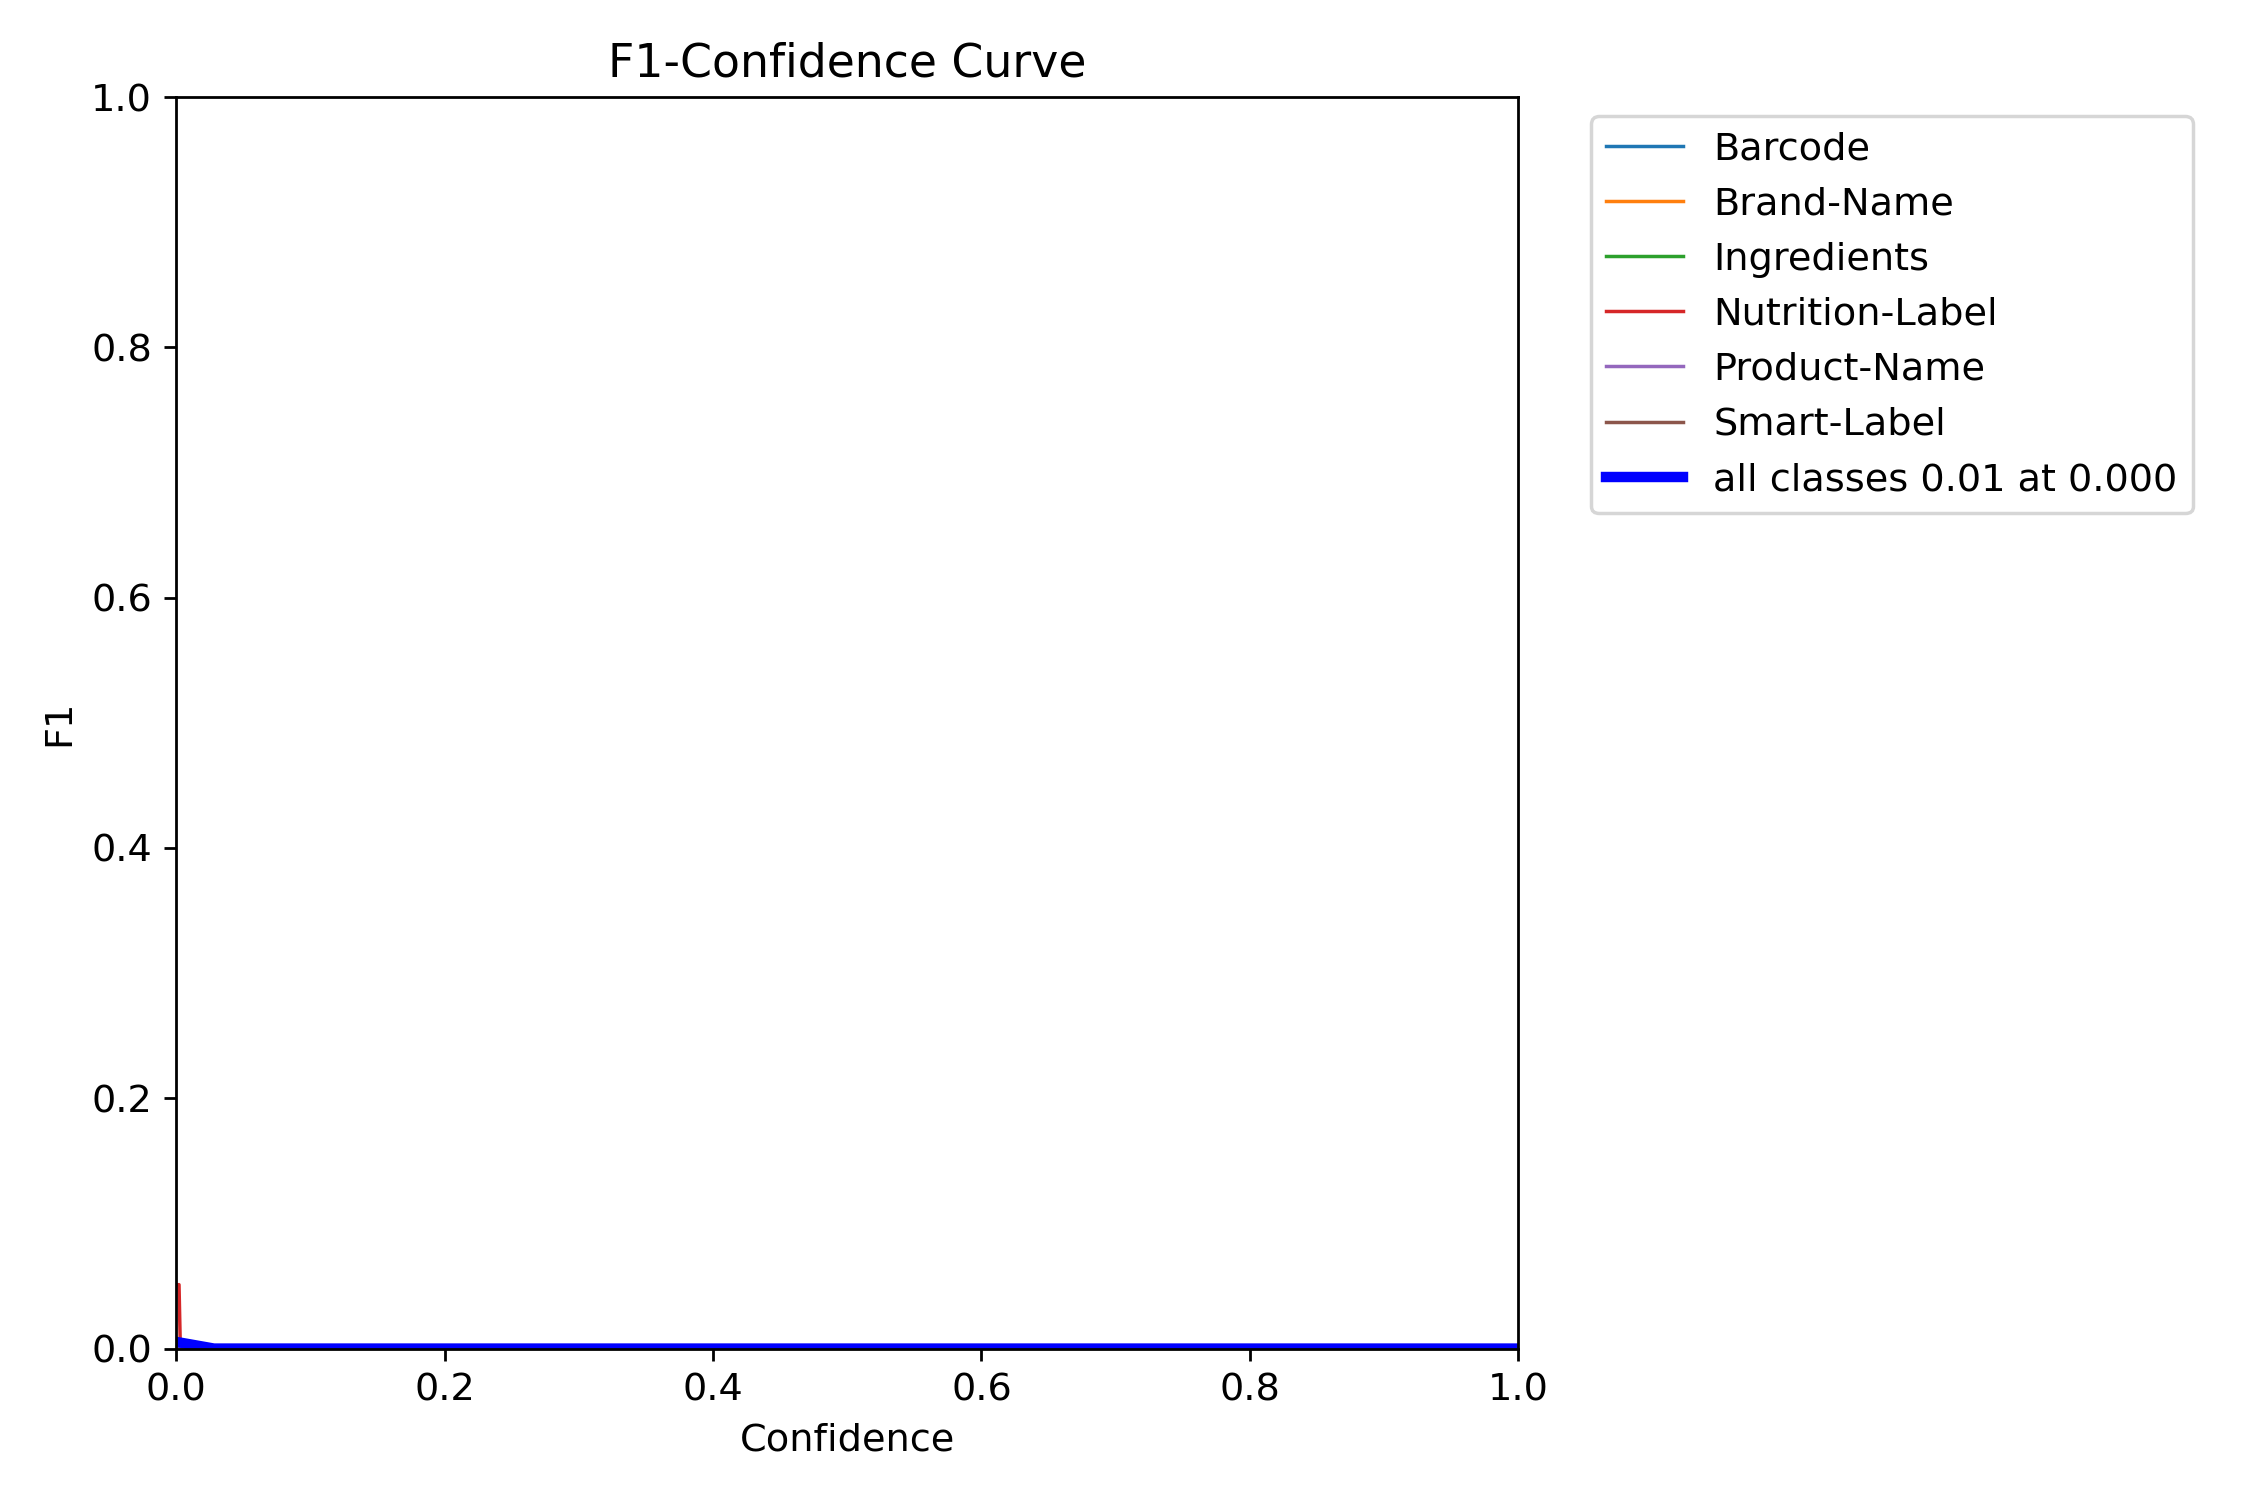

In [18]:
Image(filename=f'/content/runs/segment/train2/BoxF1_curve.png', width=1000)

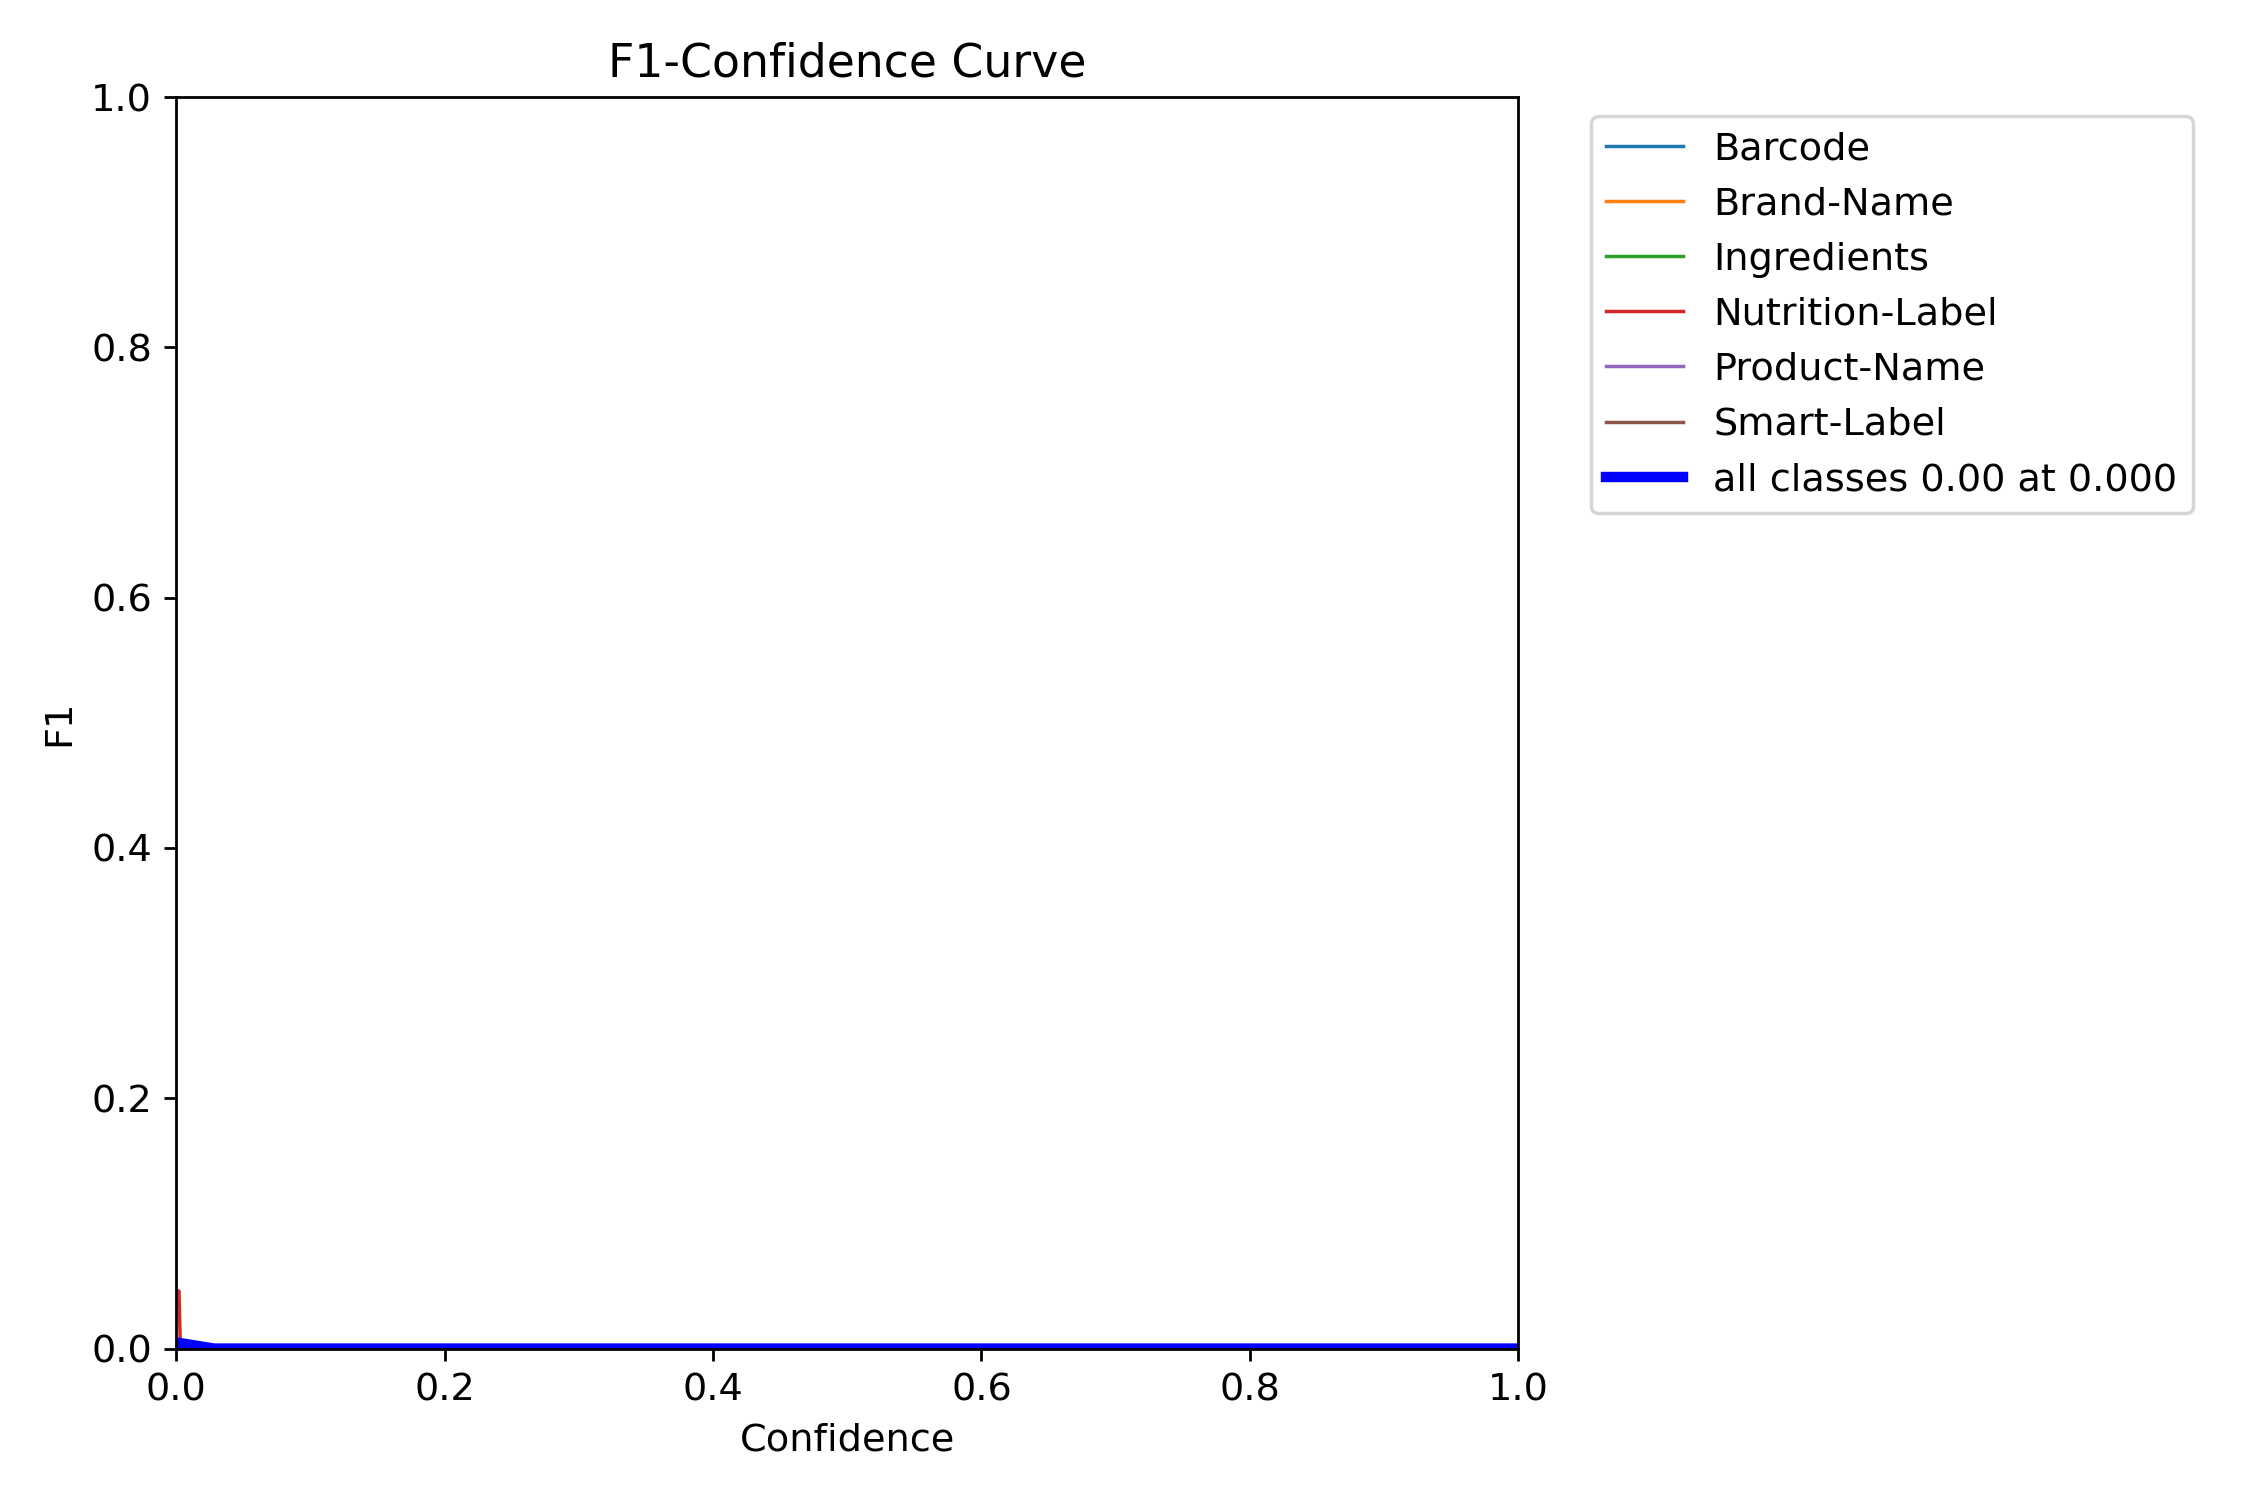

In [19]:
Image(filename=f'/content/runs/segment/train2/MaskF1_curve.png', width=1000)

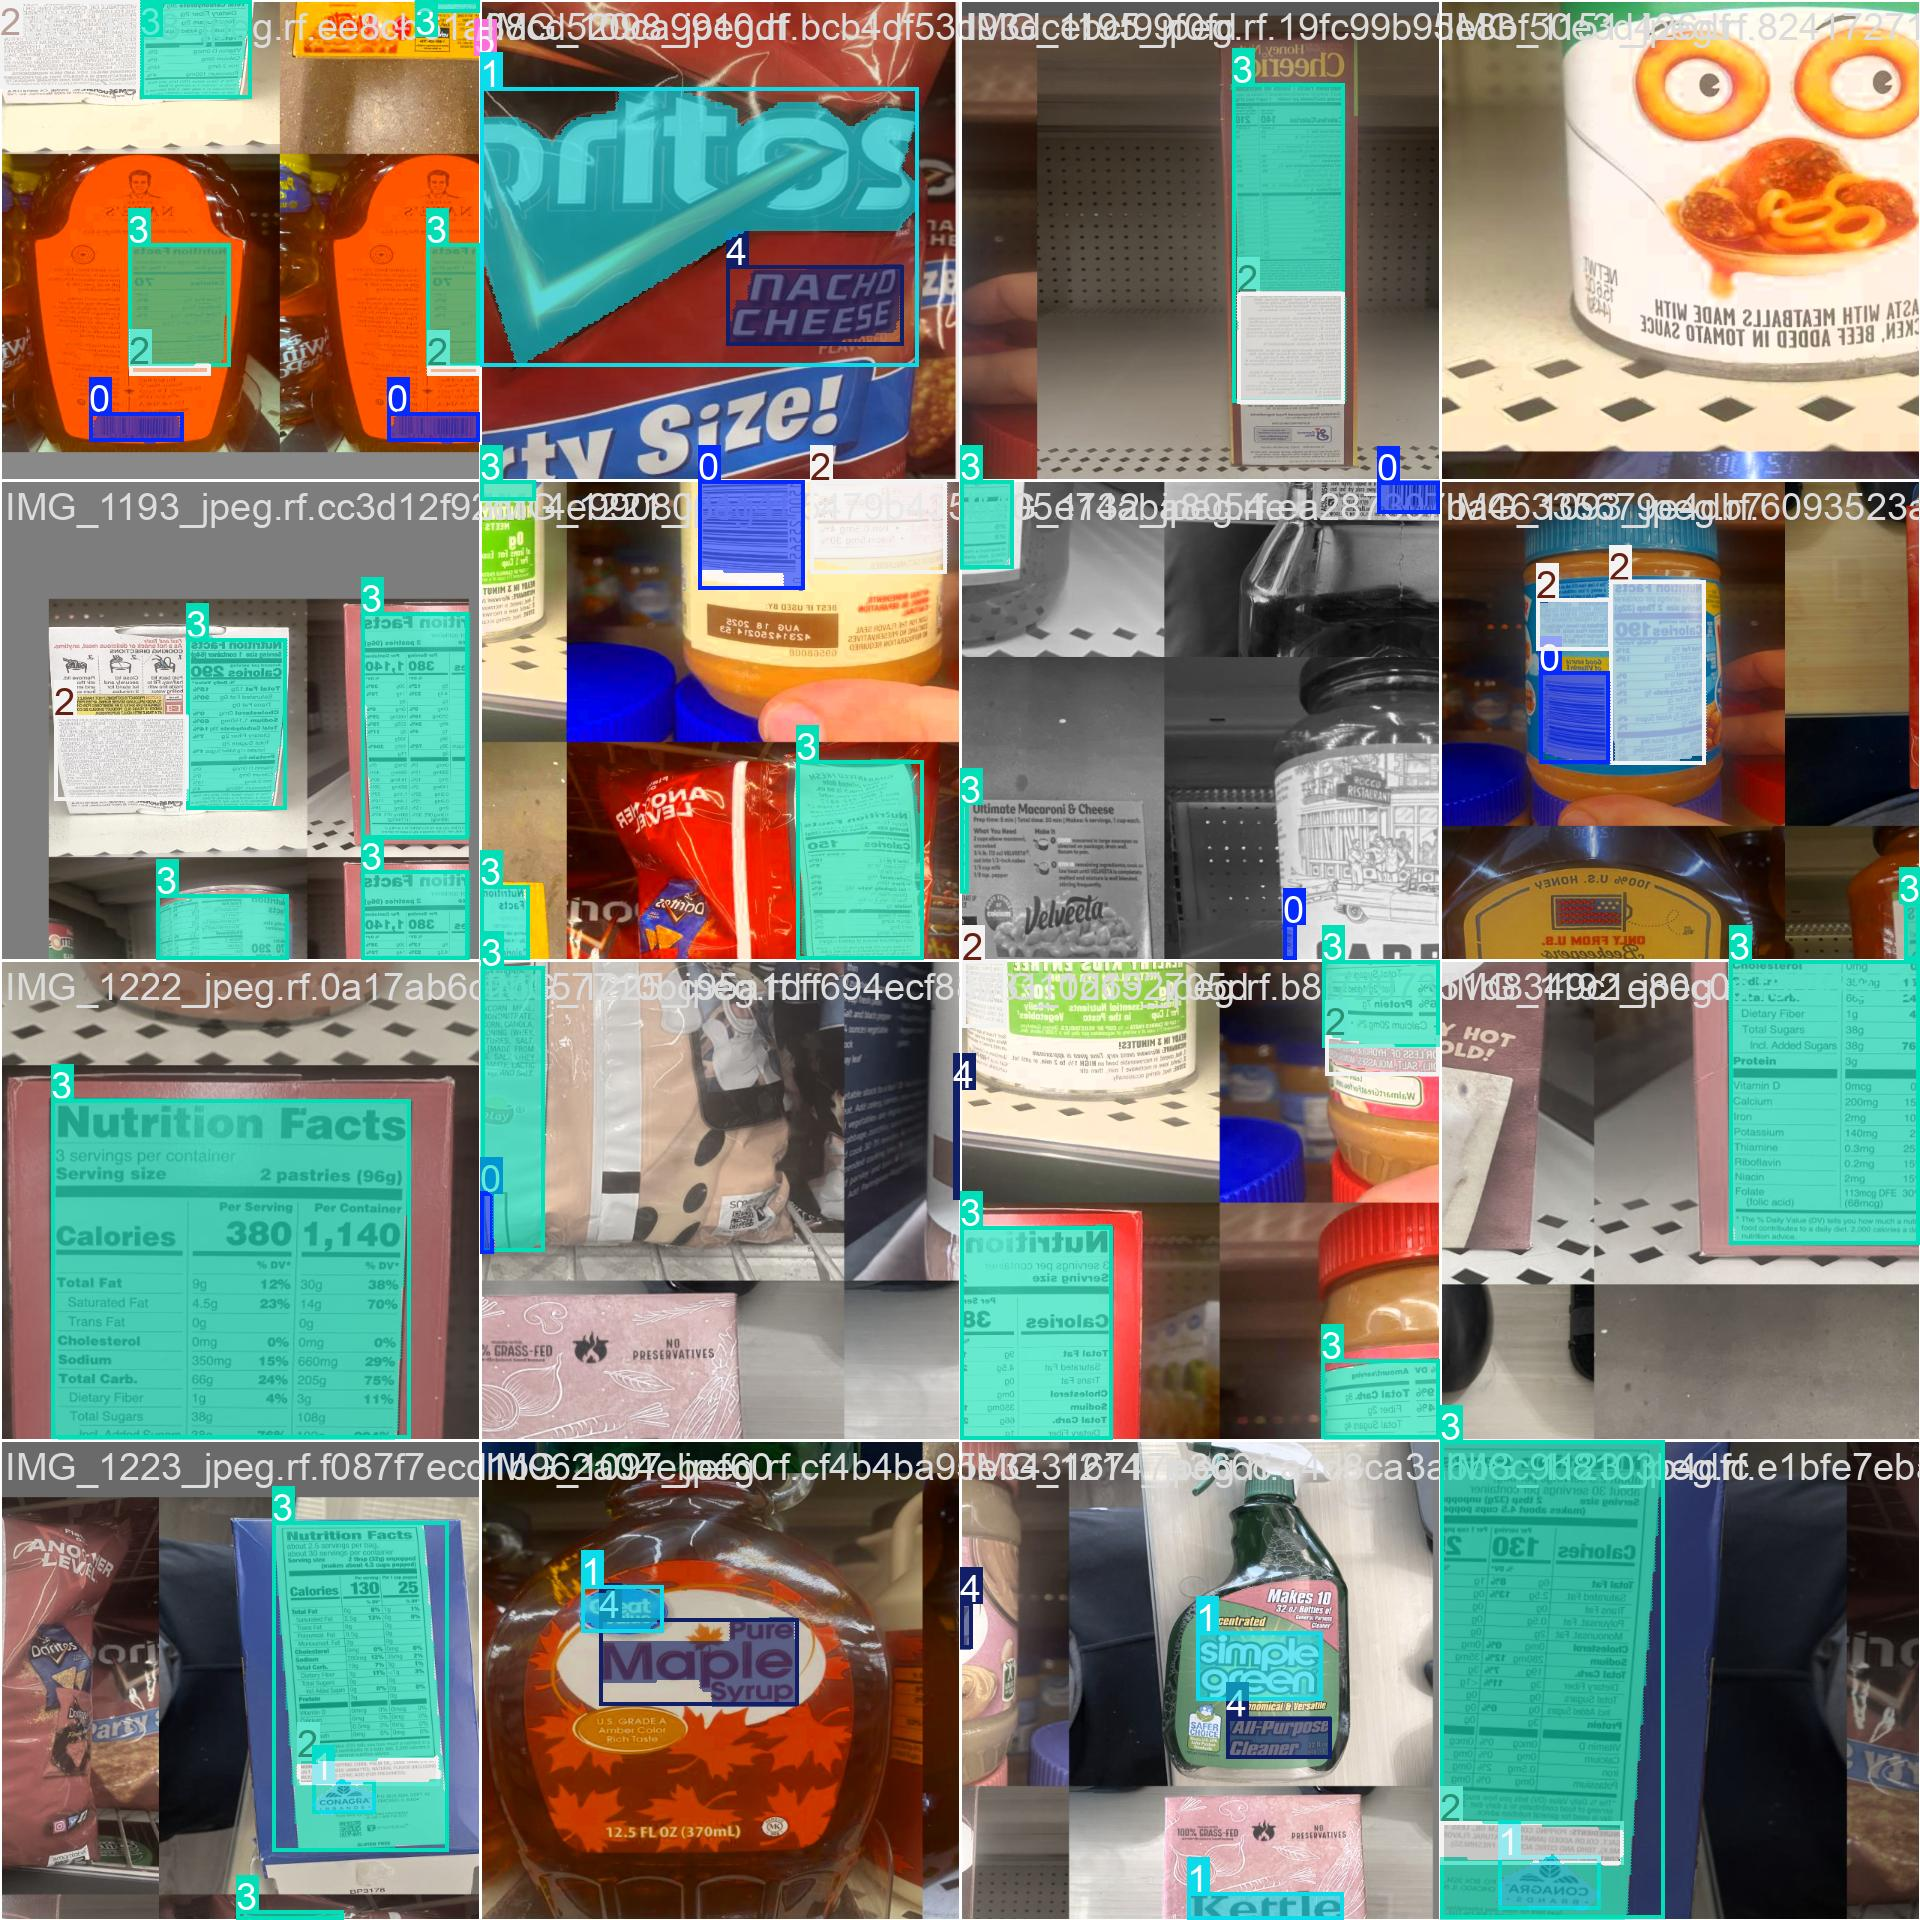

In [20]:
Image(filename=f'/content/runs/segment/train2/train_batch2.jpg', width=1000)

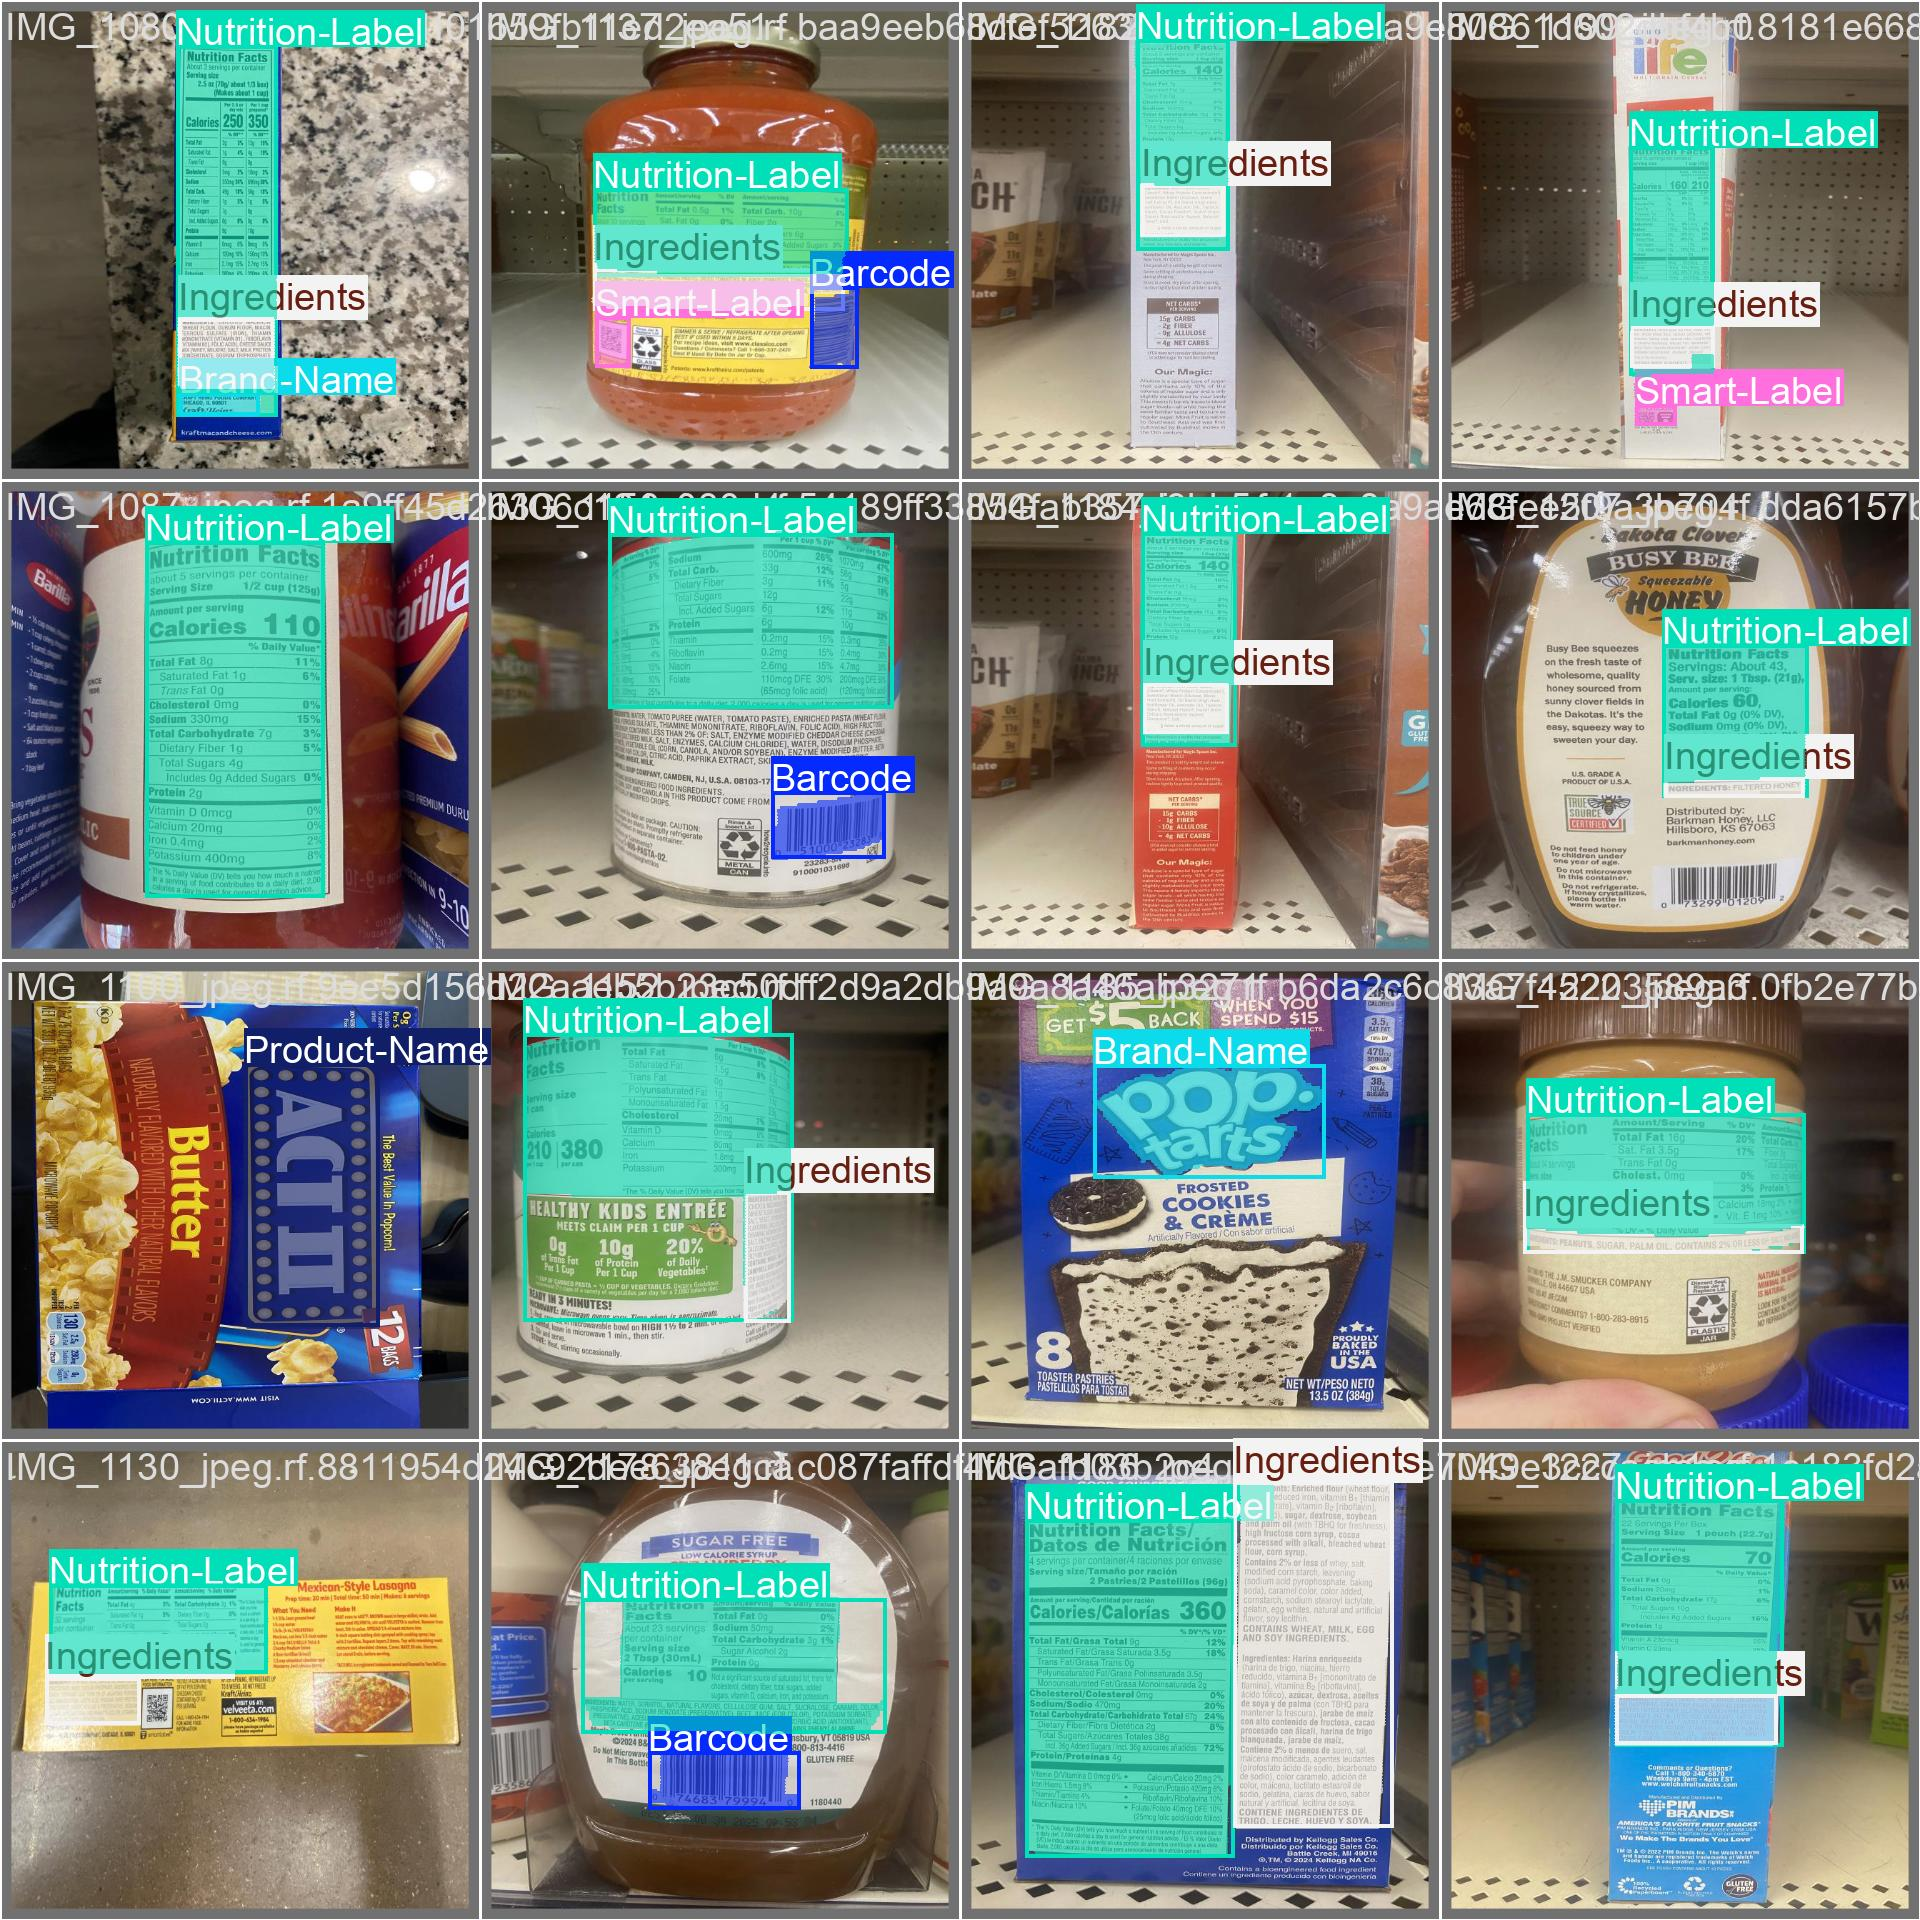

In [22]:
Image(filename=f'/content/runs/segment/train2/val_batch0_labels.jpg', width=1000)

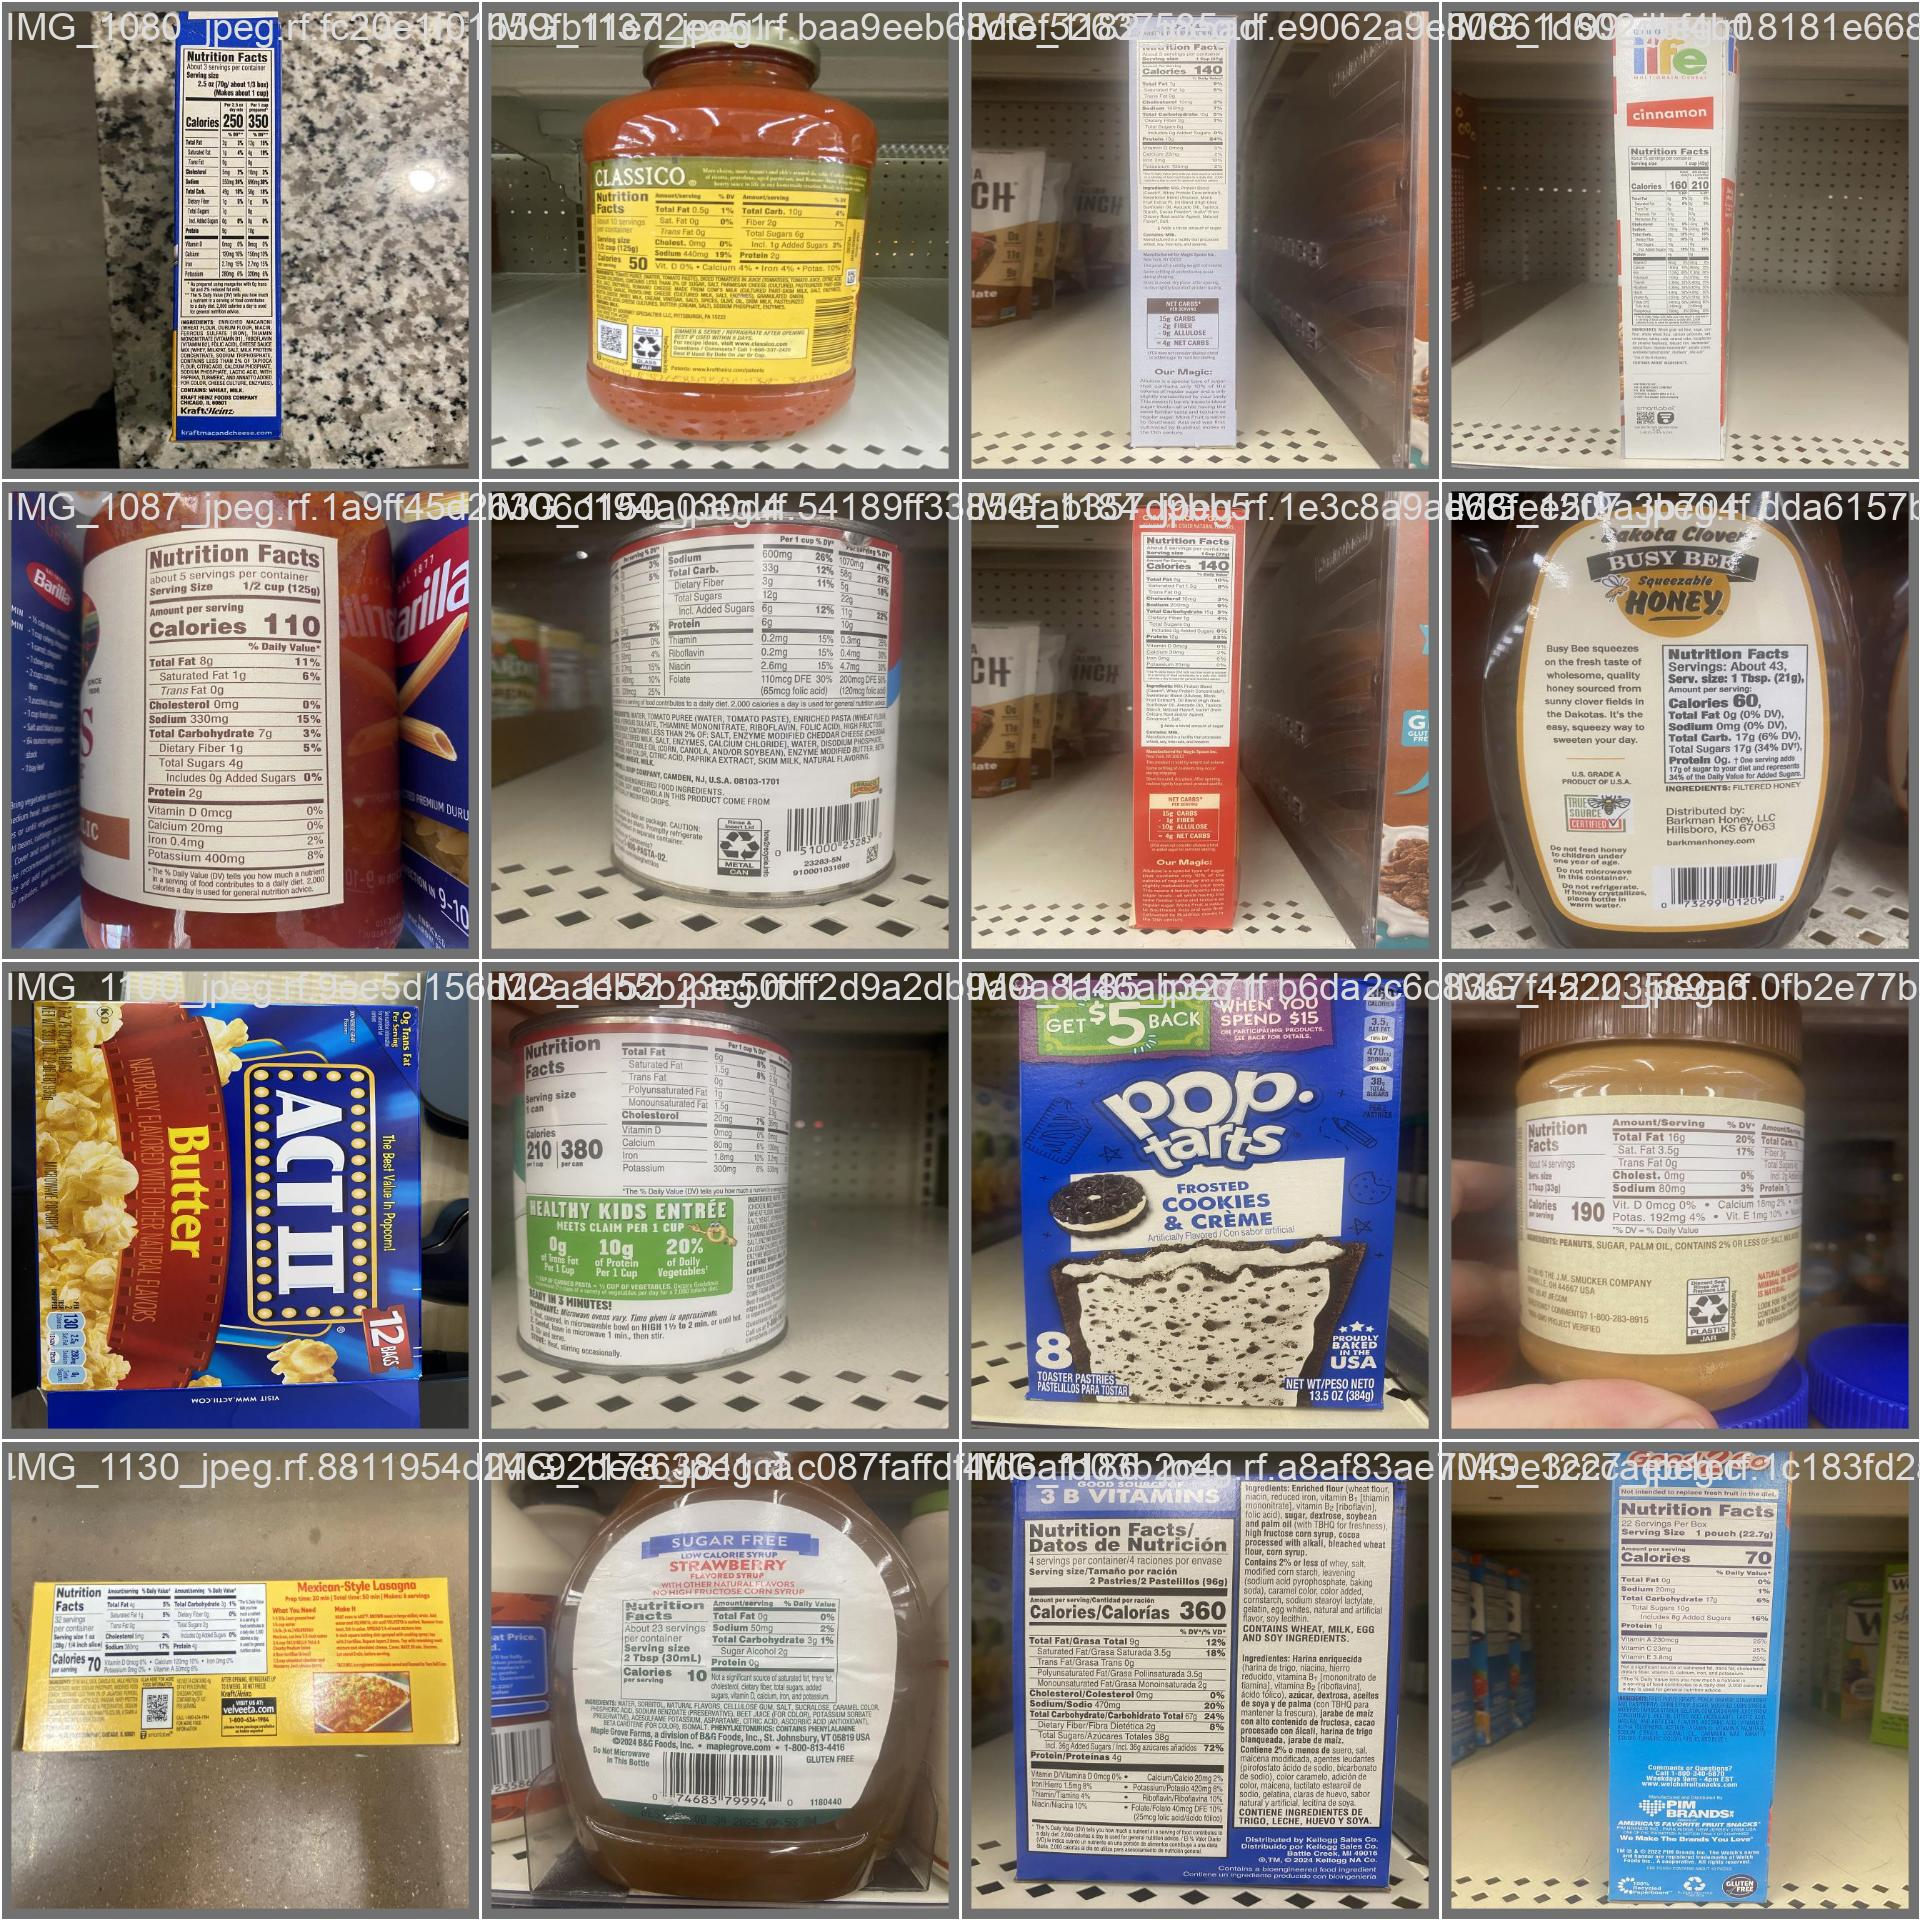

In [23]:
Image(filename=f'/content/runs/segment/train2/val_batch0_pred.jpg', width=1000)

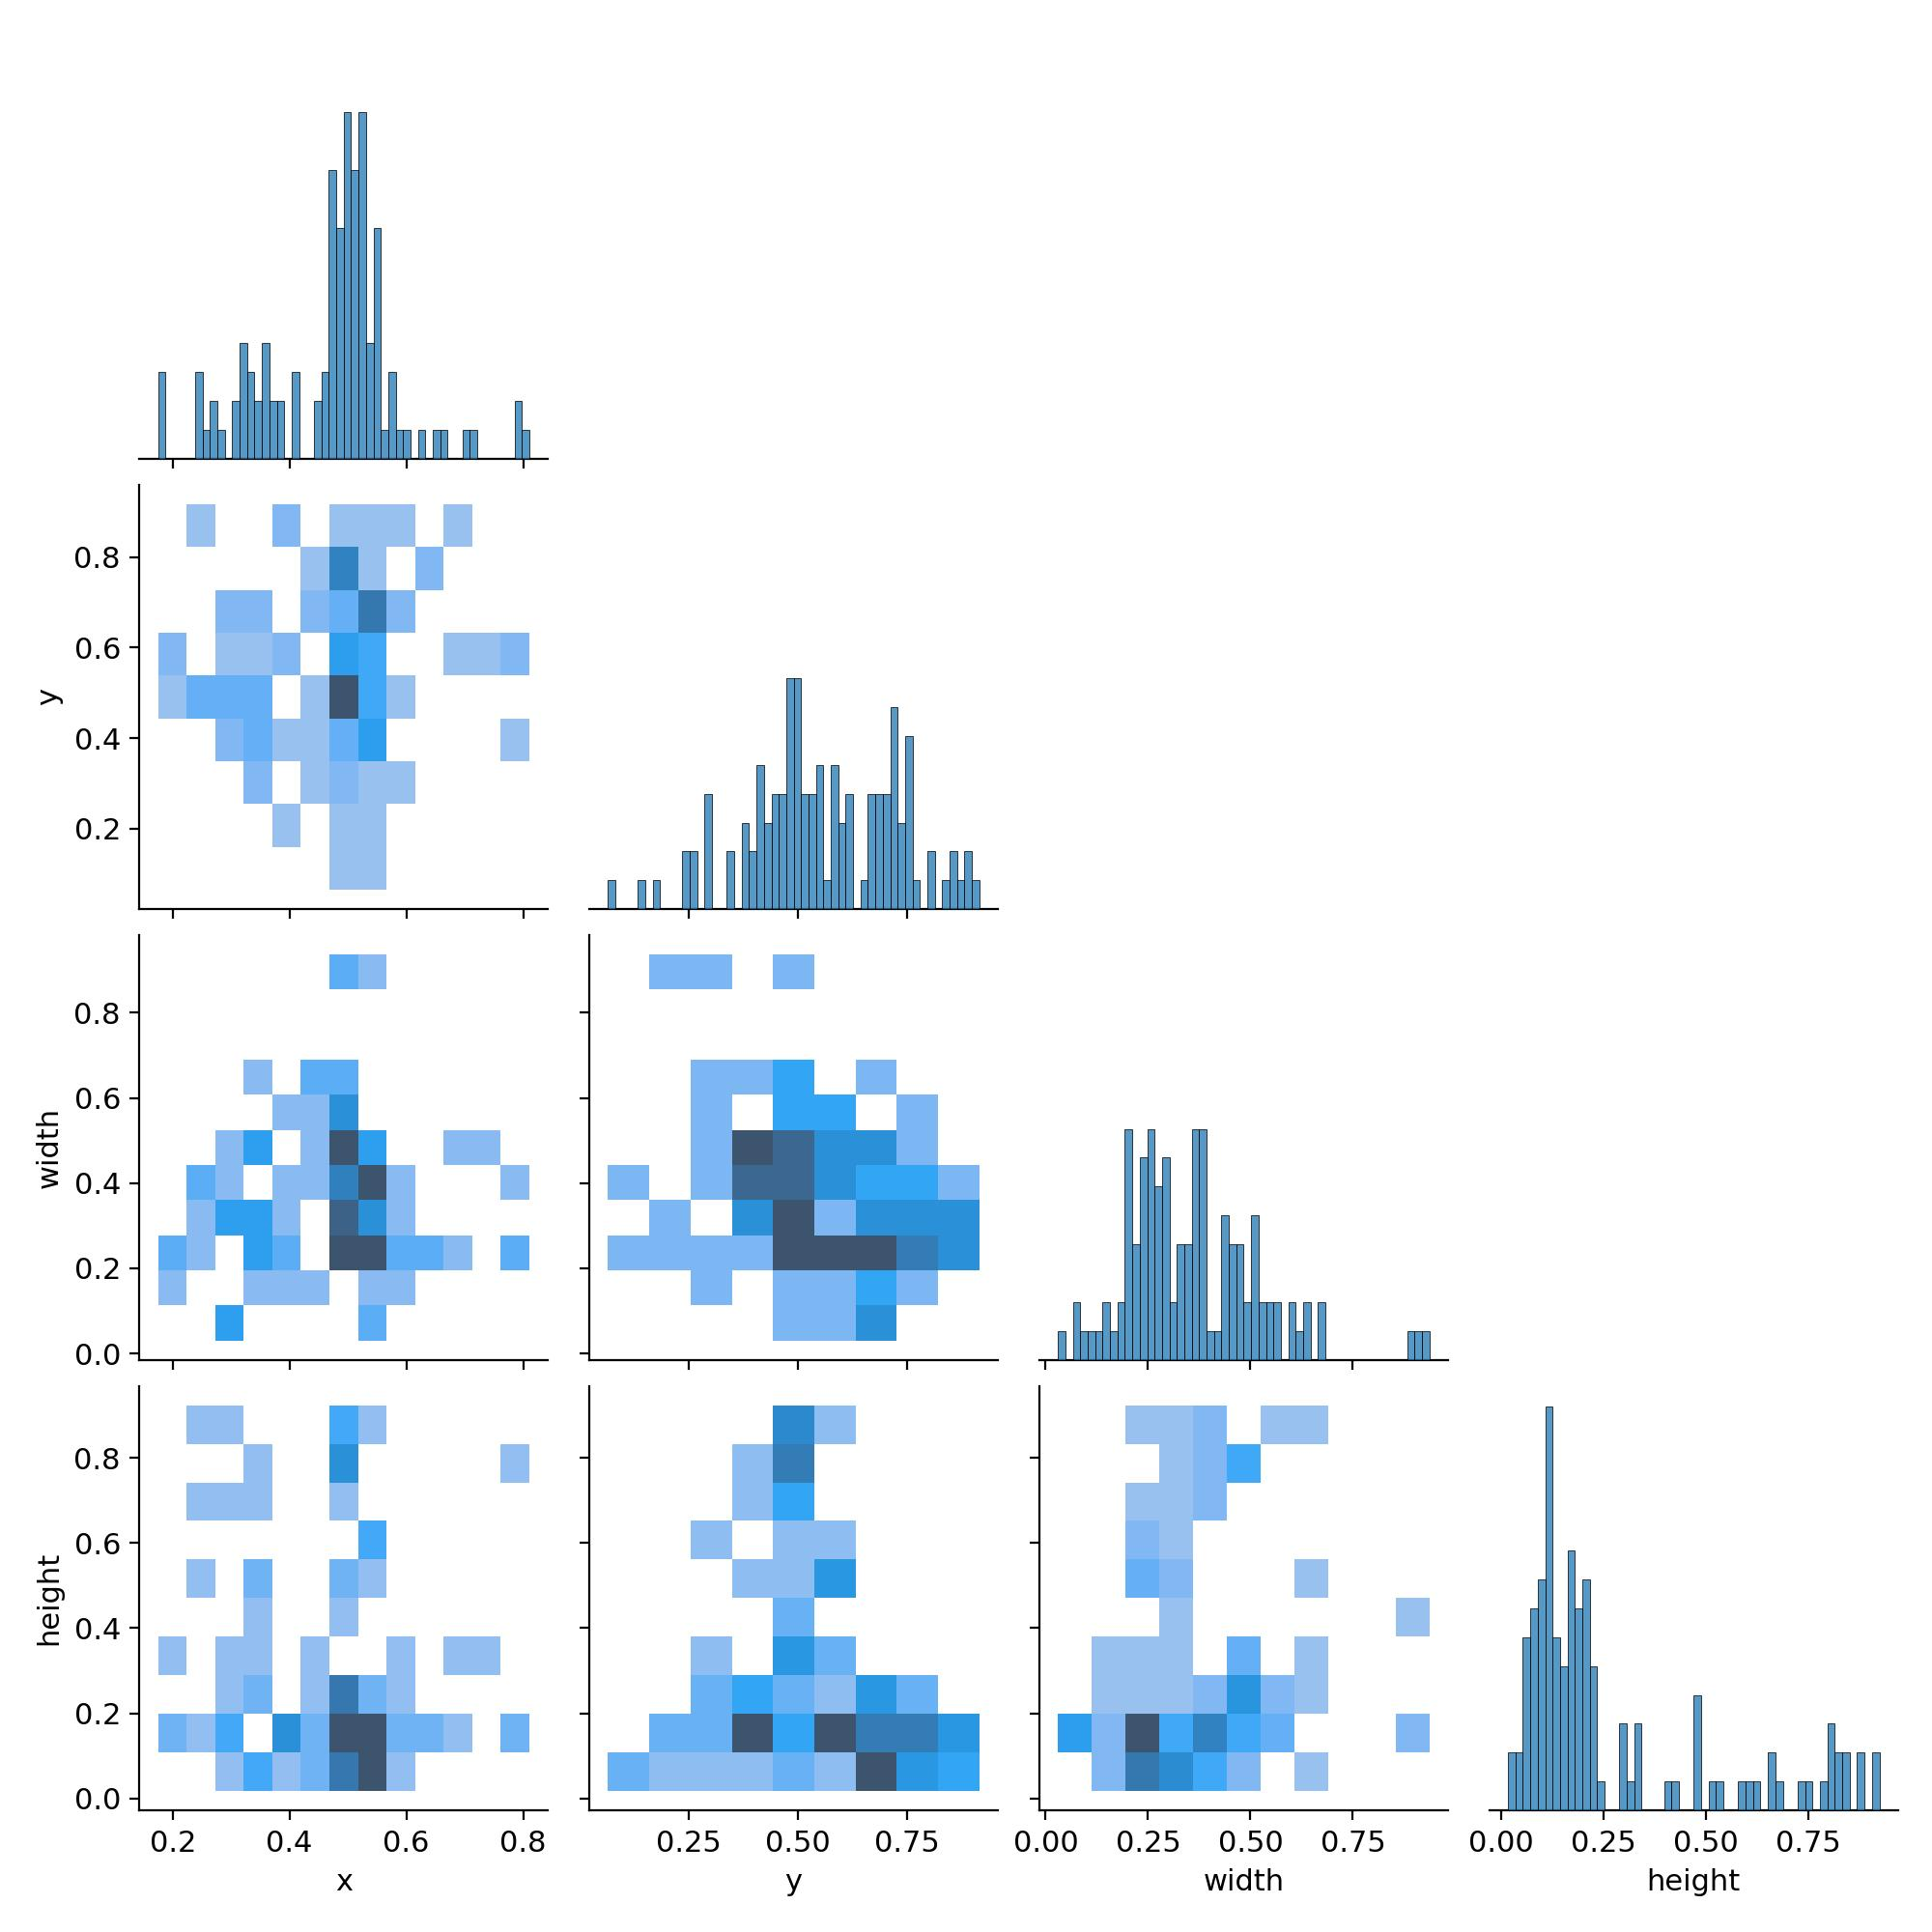

In [24]:
Image(filename=f'/content/runs/segment/train2/labels_correlogram.jpg', width=1000)

# PREDICT